## 데이터 가져오기

In [1]:
import pandas as pd
import os

csv_path = os.getenv("HOME") + "/project/aiffel-lms/F5_Linear_Regression/train.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 컬럼을 변환 및 데이터 개수 시각화하기

In [2]:
datetime = pd.to_datetime(df['datetime'])

dyear, dmonth, dday, dhour, dminute, dsecond  = datetime.dt.year, datetime.dt.month, datetime.dt.day, datetime.dt.hour, datetime.dt.minute, datetime.dt.second
df["year"], df["month"], df["day"], df["hour"], df["minute"], df["second"] = dyear, dmonth, dday, dhour, dminute, dsecond

print(df)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        

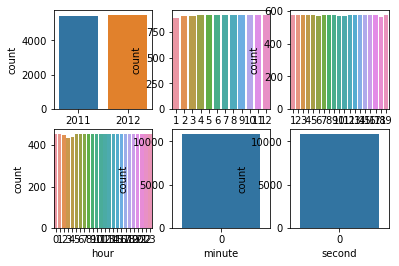

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2,3)
axx = axes.flatten()
sns.countplot(data=df, x='year', ax=axx[0]) 
sns.countplot(data=df, x='month', ax=axx[1])
sns.countplot(data=df, x='day', ax=axx[2])
sns.countplot(data=df, x='hour', ax=axx[3])
sns.countplot(data=df, x='minute', ax=axx[4])
sns.countplot(data=df, x='second', ax=axx[5])



---
## 컬럼 선택 및 train/test 데이터 분리

In [4]:
X = df[['season', 'workingday',	'weather', 'temp', 'humidity', 'month', 'day', 'hour']].values
y = df['count'].values

print('X\n', X)
print('y\n', y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X
 [[ 1.  0.  1. ...  1.  1.  0.]
 [ 1.  0.  1. ...  1.  1.  1.]
 [ 1.  0.  1. ...  1.  1.  2.]
 ...
 [ 4.  1.  1. ... 12. 19. 21.]
 [ 4.  1.  1. ... 12. 19. 22.]
 [ 4.  1.  1. ... 12. 19. 23.]]
y
 [ 16  40  32 ... 168 129  88]
(8708, 8) (8708,)
(2178, 8) (2178,)


---
## LinearRegression 모델 학습

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)


LinearRegression()

---
## 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

In [6]:
predictions = model.predict(X_test)
predictions

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse**0.5

print('mse:', mse)
print('rmse:', rmse)


mse: 21665.31870869094
rmse: 147.191435582003


---
## x축은 temp or humidity로, y축은 count로 예측 결과 시각화하기

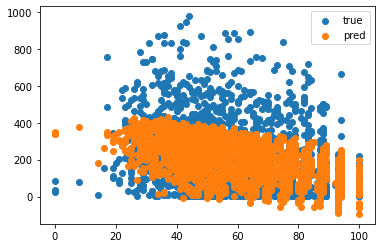

In [10]:
plt.scatter(X_test[:, 4], y_test, label="true")
plt.scatter(X_test[:, 4], predictions, label="pred")
plt.legend()
plt.show()